# Hedging Against the Stock Market: Risk Allocation Using Tools from a New Science

## Exploratory Data Analysis and Cleaning

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [2]:
df.tail()

,Date,Open,High,Low,Close,Volume,Name
93607,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
93608,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
93609,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
93610,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA
93611,2017-12-29,69.79,70.13,69.43,69.85,6613070,AABA


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93612 entries, 0 to 93611
Data columns (total 7 columns):
Date      93612 non-null object
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 5.0+ MB


In [4]:
import random

rand_list = []

for x in range(10):
    rand_list.append(random.randint(1, len(df)))

for x in rand_list:
    print(type(df['Date'][x]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
is_unique = df['Name'].unique()
print(is_unique)
print('\n')
print('number of stocks:',len(is_unique))

['MMM' 'AXP' 'AAPL' 'BA' 'CAT' 'CVX' 'CSCO' 'KO' 'DIS' 'XOM' 'GE' 'GS'
 'HD' 'IBM' 'INTC' 'JNJ' 'JPM' 'MCD' 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'TRV'
 'UTX' 'UNH' 'VZ' 'WMT' 'GOOGL' 'AMZN' 'AABA']


number of stocks: 31


In [7]:
ticker_mapping = {'AABA':'Altaba', 
                  'AAPL':'Apple', 
                  'AMZN': 'Amazon',
                  'AXP':'American Express', 
                  'BA':'Boeing', 
                  'CAT':'Caterpillar',
                  'MMM':'3M', 
                  'CVX':'Chevron', 
                  'CSCO':'Cisco Systems',
                  'KO':'Coca-Cola', 
                  'DIS':'Walt Disney', 
                  'XOM':'Exxon Mobil',
                  'GE': 'General Electric',
                  'GS':'Goldman Sachs',
                  'HD': 'Home Depot',
                  'IBM': 'IBM',
                  'INTC': 'Intel',
                  'JNJ':'Johnson & Johnson',
                  'JPM':'JPMorgan Chase',
                  'MCD':'Mcdonald\'s',
                  'MRK':'Merk',
                  'MSFT':'Microsoft',
                  'NKE':'Nike',
                  'PFE':'Pfizer',
                  'PG':'Procter & Gamble',
                  'TRV':'Travelers',
                  'UTX':'United Technologies',
                  'UNH':'UnitedHealth',
                  'VZ':'Verizon',
                  'WMT':'Walmart',
                  'GOOGL':'Google'}

df['Name'] = df['Name'].map(ticker_mapping)

## Preprocessing

In [8]:
df['Close_Diff'] = df['Close'] - df['Open']

df_close = df.pivot(index='Date', columns='Name', values='Close')
df_open = df.pivot(index='Date', columns='Name', values='Open')
df_close_diff = df.pivot(index='Date', columns='Name', values='Close_Diff')
df_high = df.pivot(index='Date', columns='Name', values='High')
df_low = df.pivot(index='Date', columns='Name', values='Low')

In [9]:
df_close.head()

Name,3M,Altaba,Amazon,American Express,Apple,Boeing,Caterpillar,Chevron,Cisco Systems,Coca-Cola,...,Microsoft,Nike,Pfizer,Procter & Gamble,Travelers,United Technologies,UnitedHealth,Verizon,Walmart,Walt Disney
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,79.11,40.91,47.58,52.58,10.68,70.44,57.80,59.08,17.45,20.45,...,26.84,10.74,23.78,58.78,45.99,56.53,61.73,30.38,46.23,24.40
2006-01-04,78.71,40.97,47.25,51.95,10.71,71.17,59.27,58.91,17.85,20.41,...,26.97,10.69,24.55,58.89,46.50,56.19,61.88,31.27,46.32,23.99
2006-01-05,77.99,41.53,47.65,52.50,10.63,70.33,59.27,58.19,18.35,20.51,...,26.99,10.76,24.58,58.70,46.95,55.98,61.69,31.63,45.69,24.41
2006-01-06,78.63,43.21,47.87,52.68,10.90,69.35,60.45,59.25,18.77,20.70,...,26.91,10.72,24.85,58.64,47.21,56.16,62.90,31.35,45.88,24.74
2006-01-09,79.02,43.42,47.08,53.99,10.86,68.77,61.55,58.95,19.06,20.80,...,26.86,10.88,24.85,59.08,47.23,56.80,61.40,31.48,45.71,25.00


### Detrending and Data Cleaning

In [10]:
stocks = df_close.columns.tolist()

df_list = [df_close, df_open, df_close_diff, df_high, df_low]

for df in df_list:
    for s in stocks:
        df[s] = df[s].diff()

In [11]:
df_close.head()

Name,3M,Altaba,Amazon,American Express,Apple,Boeing,Caterpillar,Chevron,Cisco Systems,Coca-Cola,...,Microsoft,Nike,Pfizer,Procter & Gamble,Travelers,United Technologies,UnitedHealth,Verizon,Walmart,Walt Disney
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.40,0.06,-0.33,-0.63,0.03,0.73,1.47,-0.17,0.40,-0.04,...,0.13,-0.05,0.77,0.11,0.51,-0.34,0.15,0.89,0.09,-0.41
2006-01-05,-0.72,0.56,0.40,0.55,-0.08,-0.84,0.00,-0.72,0.50,0.10,...,0.02,0.07,0.03,-0.19,0.45,-0.21,-0.19,0.36,-0.63,0.42
2006-01-06,0.64,1.68,0.22,0.18,0.27,-0.98,1.18,1.06,0.42,0.19,...,-0.08,-0.04,0.27,-0.06,0.26,0.18,1.21,-0.28,0.19,0.33
2006-01-09,0.39,0.21,-0.79,1.31,-0.04,-0.58,1.10,-0.30,0.29,0.10,...,-0.05,0.16,0.00,0.44,0.02,0.64,-1.50,0.13,-0.17,0.26


In [12]:
df_close.isnull().sum()

Name
3M                     1
Altaba                 3
Amazon                 3
American Express       1
Apple                  3
Boeing                 1
Caterpillar            1
Chevron                1
Cisco Systems          3
Coca-Cola              1
Exxon Mobil            1
General Electric       1
Goldman Sachs          1
Google                 3
Home Depot             1
IBM                    1
Intel                  3
JPMorgan Chase         1
Johnson & Johnson      1
Mcdonald's             1
Merk                   3
Microsoft              3
Nike                   1
Pfizer                 1
Procter & Gamble       1
Travelers              1
United Technologies    1
UnitedHealth           1
Verizon                1
Walmart                1
Walt Disney            1
dtype: int64

In [13]:
for df in df_list:
    df.dropna(inplace=True)

## Building a Stock Correlation Network

### An Introduction to Distance Correlation

In [14]:
import dcor

def df_distance_correlation(data):
    data_dcor = pd.DataFrame(index=stocks, columns=stocks)
    
    k=0
    for i in stocks:
        
        v_i = data.loc[:, i].values
        for j in stocks[k:]:
            
            v_j = data.loc[:, j].values
            dcor_val = dcor.distance_correlation(v_i, v_j)
            data_dcor.at[i,j] = dcor_val
            data_dcor.at[j,i] = dcor_val
        k+=1
    
    return data_dcor

In [15]:
df_dcor_list=[]
for df in df_list:
    df_dcor = df_distance_correlation(df)
    df_dcor_list.append(df_dcor)

In [16]:
df_dcor_list[4].head()

,3M,Altaba,Amazon,American Express,Apple,Boeing,Caterpillar,Chevron,Cisco Systems,Coca-Cola,...,Microsoft,Nike,Pfizer,Procter & Gamble,Travelers,United Technologies,UnitedHealth,Verizon,Walmart,Walt Disney
3M,1,0.339724,0.342307,0.505698,0.344105,0.501968,0.519987,0.453556,0.473083,0.426186,...,0.447791,0.405437,0.38849,0.405331,0.483358,0.597945,0.362848,0.383761,0.339629,0.478044
Altaba,0.339724,1,0.359882,0.337897,0.325977,0.333991,0.311867,0.261008,0.338659,0.239858,...,0.340932,0.289326,0.240929,0.22363,0.269705,0.337369,0.247124,0.214387,0.200043,0.335006
Amazon,0.342307,0.359882,1,0.332556,0.396043,0.336422,0.302093,0.24653,0.312905,0.255219,...,0.407978,0.369859,0.254016,0.218311,0.277968,0.341439,0.289791,0.209912,0.224409,0.358019
American Express,0.505698,0.337897,0.332556,1,0.334704,0.449498,0.465775,0.401677,0.45252,0.351813,...,0.428977,0.397609,0.400268,0.336329,0.449868,0.513467,0.335161,0.364806,0.338264,0.462274
Apple,0.344105,0.325977,0.396043,0.334704,1,0.330394,0.342891,0.262437,0.335997,0.237279,...,0.363742,0.305976,0.224769,0.220725,0.280113,0.340231,0.258585,0.215087,0.205504,0.334284


### Building Time-Series Correlation Networks with the Networkx Package

In [17]:
import networkx as nx

# takes in a pre-processed dataframe and returns a time-series correlation
# network with pairwise distance correlation values as the edges
def build_corr_nx(data):
    
    # converts the distance correlation dataframe to a numpy matrix with dtype float
    cor_matrix = data.values.astype('float')
    
    # since dcor ranges between 0 and 1, 0 corresponding to complete independence and 1
    # corresponding to complete dependence, 1 - cor_matrix results in values closer to 0
    # denoting high dependence where values close to 1 denote low dependence
    ## this will result in a network where nodes in close proximity reflect the similarity
    ## of their respective time-series and vice versa
    sim_matrix = 1 - cor_matrix
    
    # transforms the similarity matrix into a graph
    G = nx.from_numpy_matrix(sim_matrix)
    
    # extracts the indices (i.e., the stock names from the dataframe)
    stock_names = data.index.values
    
    # relabels the nodes of the network with the stock names
    G = nx.relabel_nodes(G, lambda x: stock_names[x])
    
    # assigns the edges of the network weights (i.e., the dcor values)
    G.edges(data=True)
    
    # copies G
    ## we need this to delete edges or othwerwise modify G
    H = G.copy()
    
   
    # iterates over the edges of H (the u-v pairs) and the weights (wt)
    for (u, v, wt) in G.edges.data('weight'):
        # selects edges with 1 - dcor values of 0.65
        if wt >= 1 - 0.345:
            # removes the edges 
            H.remove_edge(u, v)
            
        # selects self-edges
        if u == v:
            # removes the self-edges
            H.remove_edge(u, v)
    
    # returns the final stock correlation network            
    return H

In [18]:
H_close = build_corr_nx(df_dcor_list[0])
H_open = build_corr_nx(df_dcor_list[1])
H_close_diff = build_corr_nx(df_dcor_list[2])
H_high = build_corr_nx(df_dcor_list[3])
H_low = build_corr_nx(df_dcor_list[4])

### Plotting Time-Series Correlation Networks with Networkx, Matplotlib, and Seaborn

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
# function to display the network from the correlation matrix
def plt_corr_nx(H):

    # creates a list of the edges of G and their corresponding weights
    edges, weights = zip(*nx.get_edge_attributes(H, "weight").items())

    # draw the network with the Kamada-Kawai path-length cost-function
    pos = nx.kamada_kawai_layout(H)

    # figure size
    plt.figure(figsize=(18, 15))

    # computes the degree (number of connections) of each node
    deg = H.degree

    # list of node names
    nodelist = []
    # list of node sizes
    node_sizes = []

    # iterates over deg and appends the node names and degrees
    for n, d in deg:
        nodelist.append(n)
        node_sizes.append(d)

    # draw nodes
    nx.draw_networkx_nodes(
        H,
        pos,
        node_color="#DA70D6",
        nodelist=nodelist,
        node_size=np.power(node_sizes, 2.5),
        alpha=0.8,
        font_weight="bold",
    )

    # node label styles
    nx.draw_networkx_labels(H, pos, font_size=12, font_family="sans-serif")

    # color map
    cmap = sns.cubehelix_palette(3, as_cmap=True, reverse=True)

    # draw edges
    nx.draw_networkx_edges(
        H,
        pos,
        edge_list=edges,
        style="solid",
        edge_color=weights,
        edge_cmap=cmap,
        edge_vmin=min(weights),
        edge_vmax=max(weights),
    )

    # builds a colorbar
    sm = plt.cm.ScalarMappable(
        cmap=cmap, 
        norm=plt.Normalize(vmin=min(weights), 
        vmax=max(weights))
    )
    sm._A = []
    plt.colorbar(sm)

    # displays network without axes
    plt.axis("off")
    # plt.savefig('dija_correlation_network.jpg')
    plt.show()
    
import warnings
warnings.filterwarnings("ignore")

## DIJA 30 Distance Correlation Networks

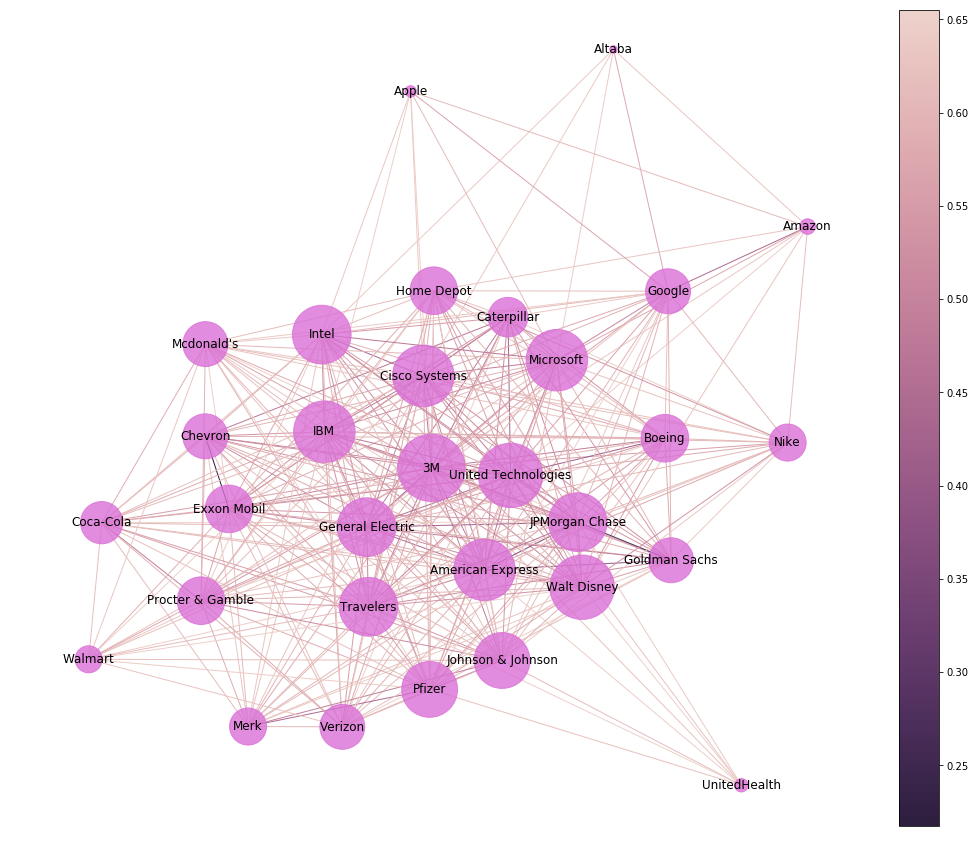

In [21]:
plt_corr_nx(H_close)

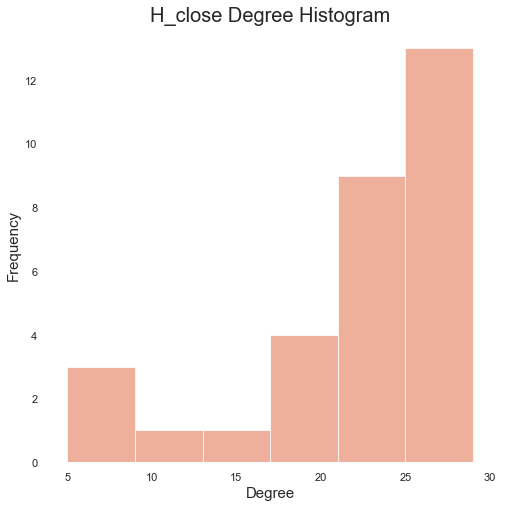

In [116]:
def hist_plot(network, title):

    plt.figure(figsize=(8,8))
    sns.set_style("white")
    sns.set_color_codes("colorblind")
    sns.distplot(
        list(dict(network.degree).values()), 
        color='darksalmon', 
        hist_kws={'alpha':0.75}, 
        kde=False
    );
    sns.despine(left=True, right=True, bottom=True, top=True)
    plt.ylabel("Frequency", size=15)
    plt.xlabel("Degree", size=15)
    plt.title(title, size=20);
    
hist_plot(H_close, 'H_close Degree Histogram')

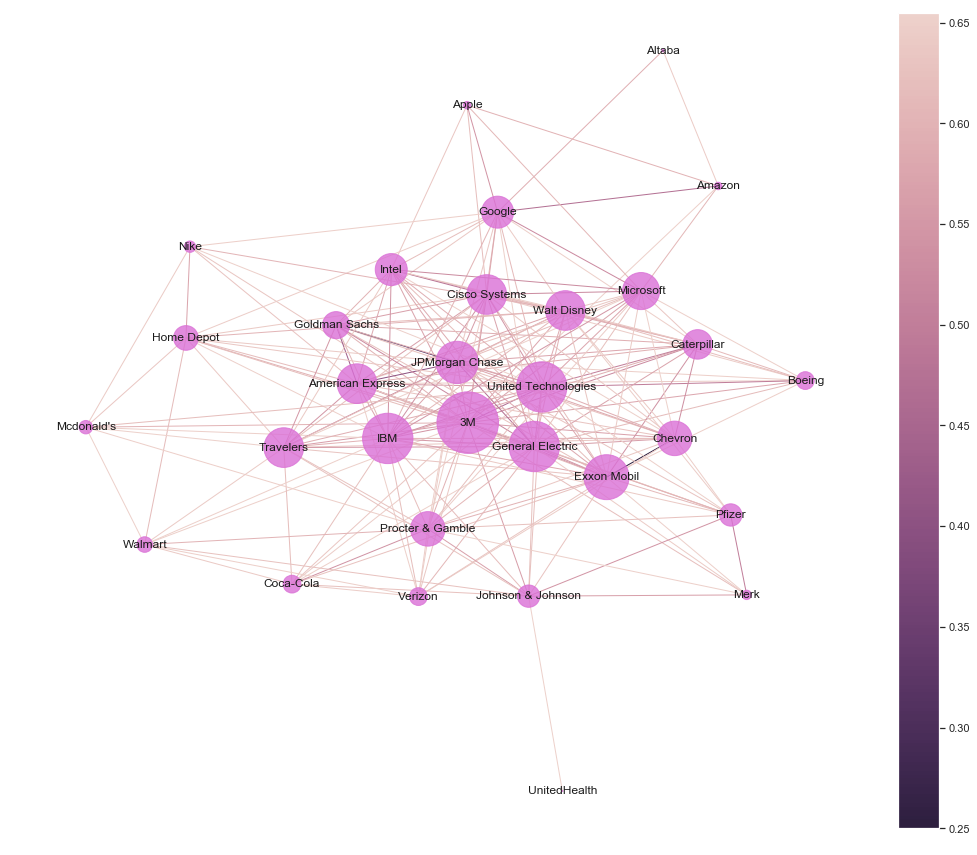

In [23]:
plt_corr_nx(H_close_diff)

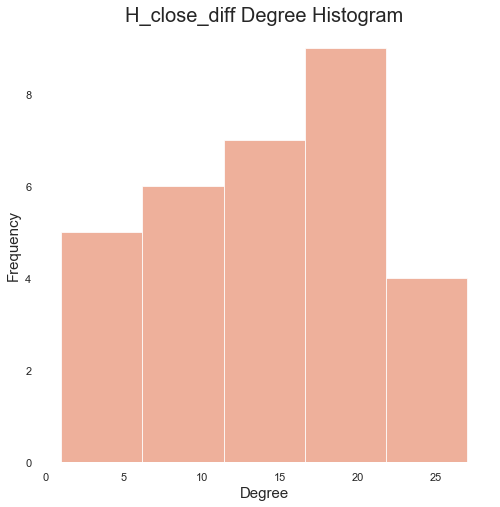

In [111]:
hist_plot(H_close_diff, 'H_close_diff Degree Histogram')

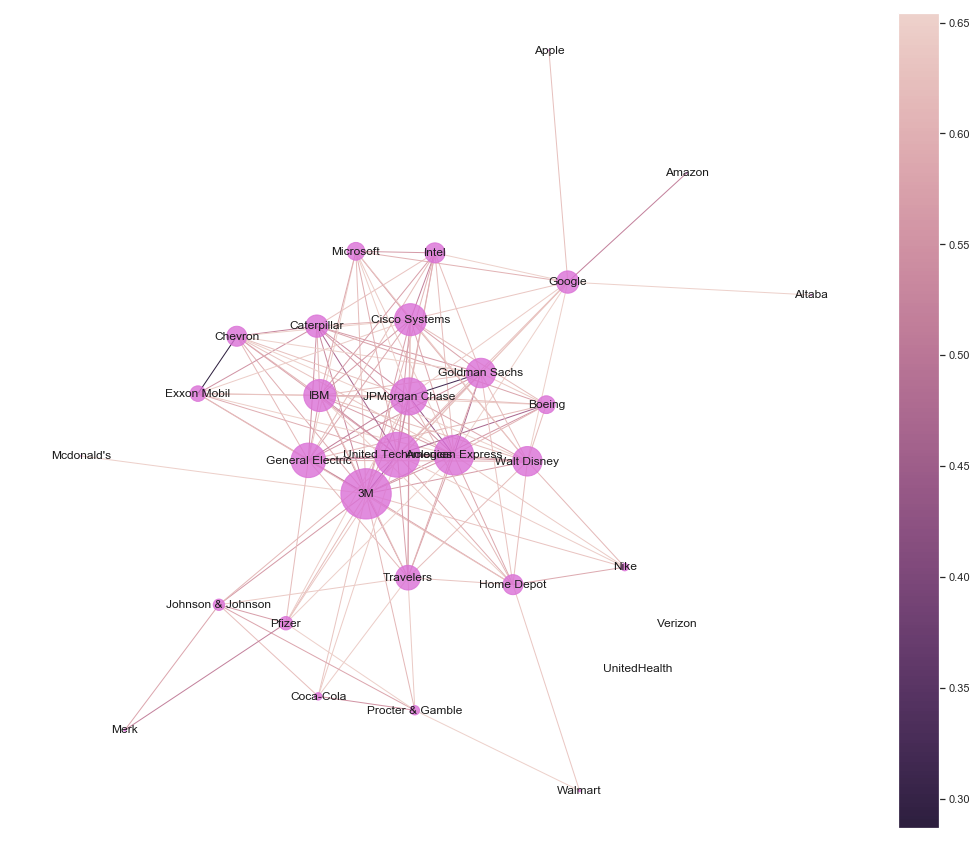

In [25]:
plt_corr_nx(H_high)

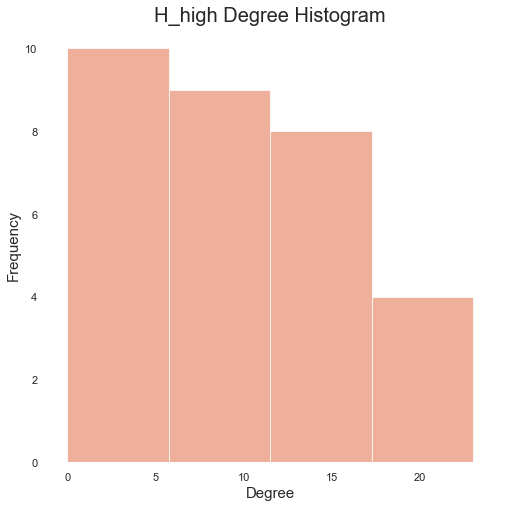

In [112]:
hist_plot(H_high, 'H_high Degree Histogram')

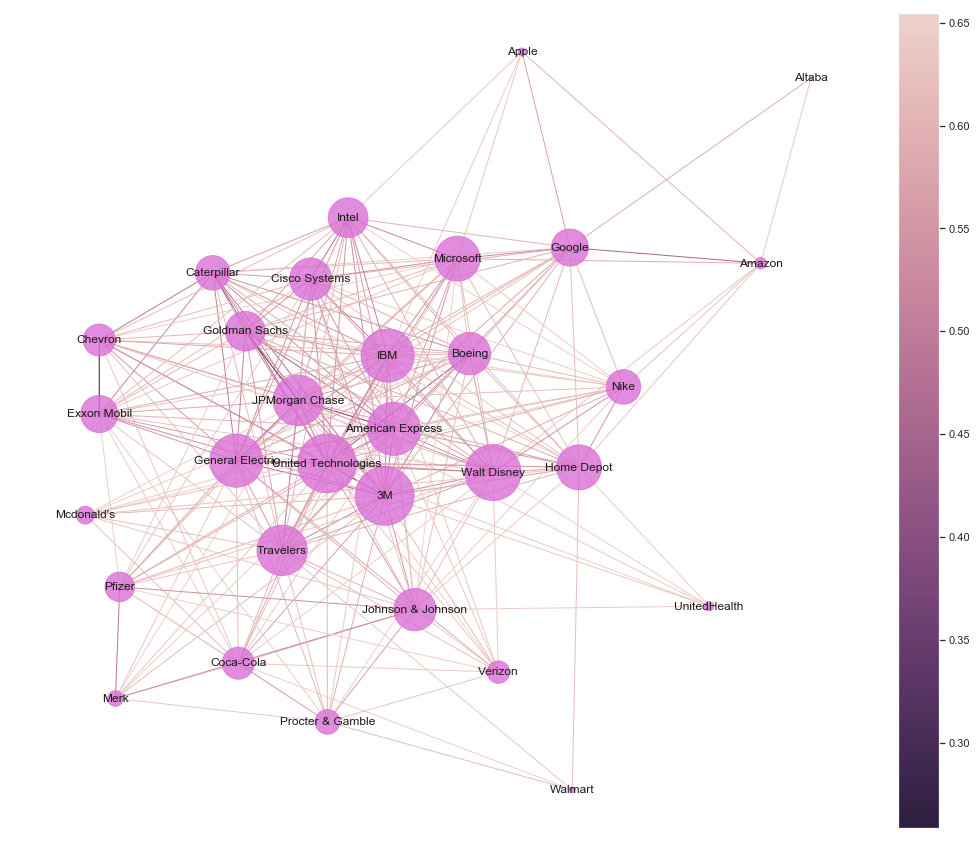

In [27]:
plt_corr_nx(H_low)

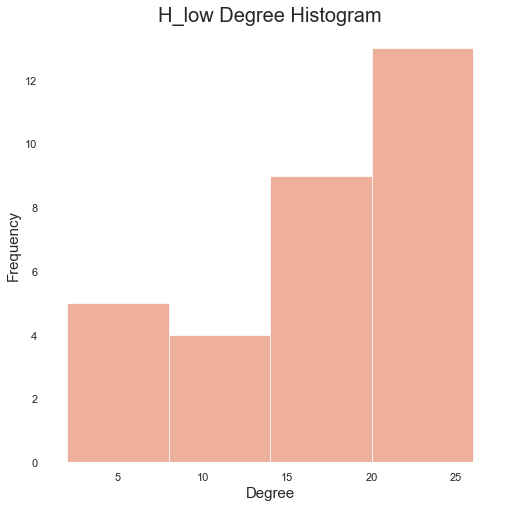

In [113]:
hist_plot(H_low, 'H_low Degree Histogram')

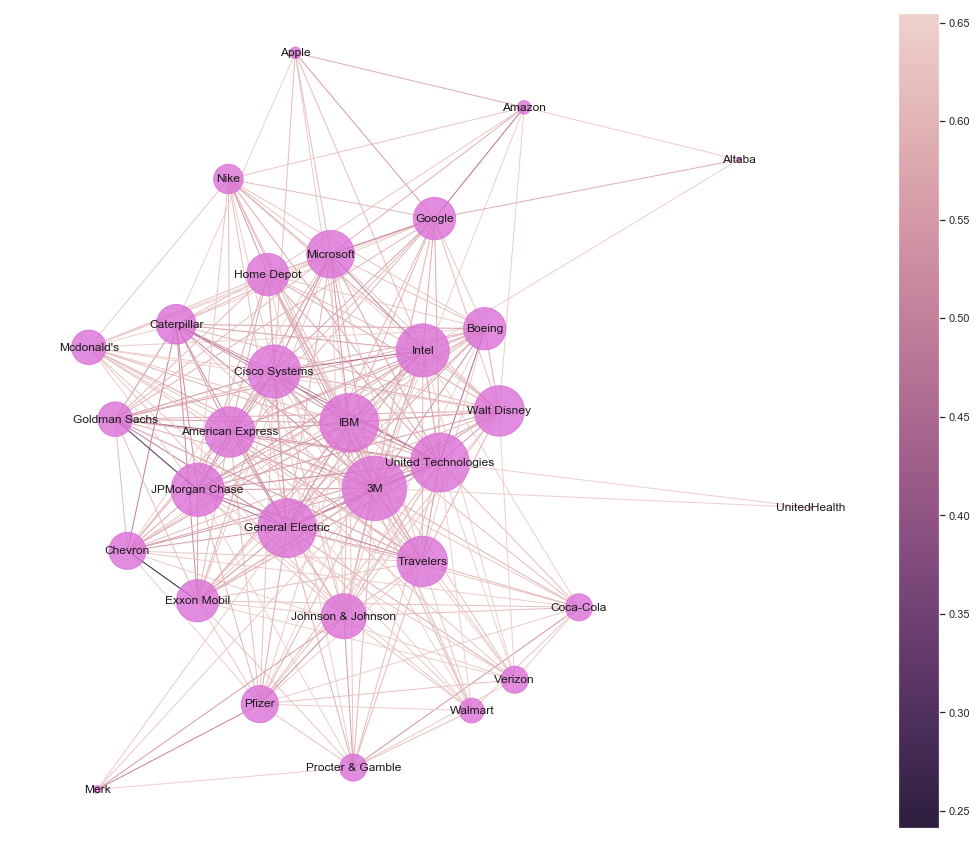

In [29]:
plt_corr_nx(H_open)

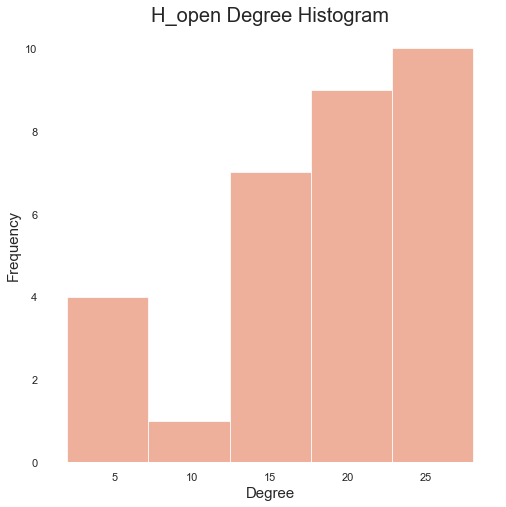

In [114]:
hist_plot(H_open, 'H_open Degree Histogram')

## Averaging Over Network Topologies

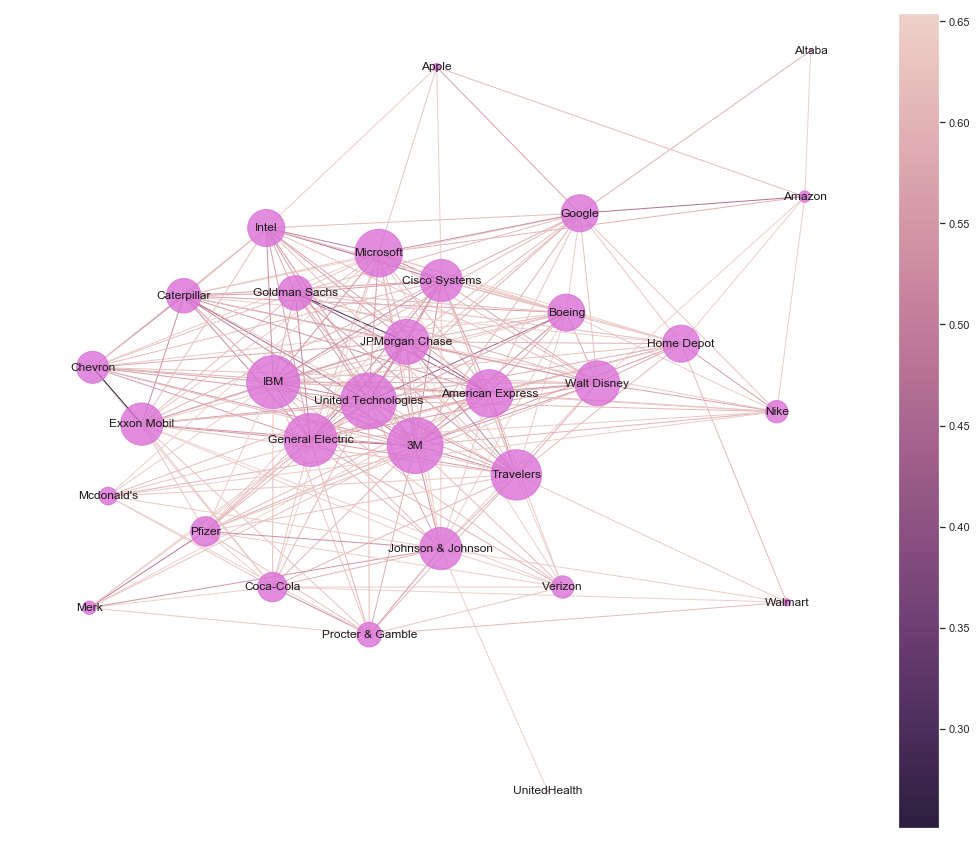

In [45]:
df_zeros = pd.DataFrame(index=stocks, columns=stocks).fillna(0)

for i in range(len(df_list)):
    df_zeros += df_dcor_list[i]
    df_master = df_zeros/len(df_list)

H_master = build_corr_nx(df_master)
plt_corr_nx(H_master)

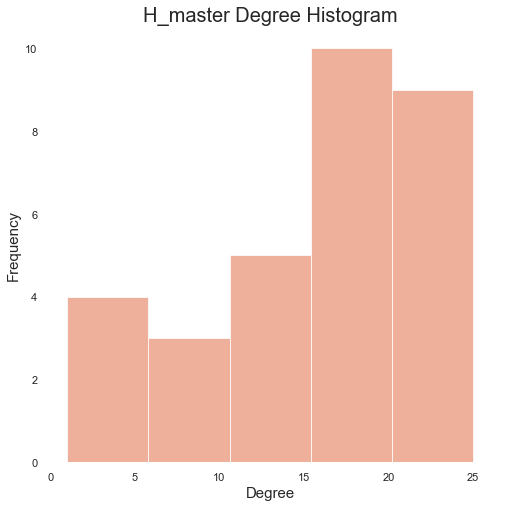

In [115]:
hist_plot(H_master, 'H_master Degree Histogram')

## Closeness Centrality as a Measure of Relative Risk

<h2><center>$C_{WF}(u) = \frac{n-1}{N-1} \frac{n - 1}{\sum_{v=1}^{n-1} d(v, u)}$</center></h2>

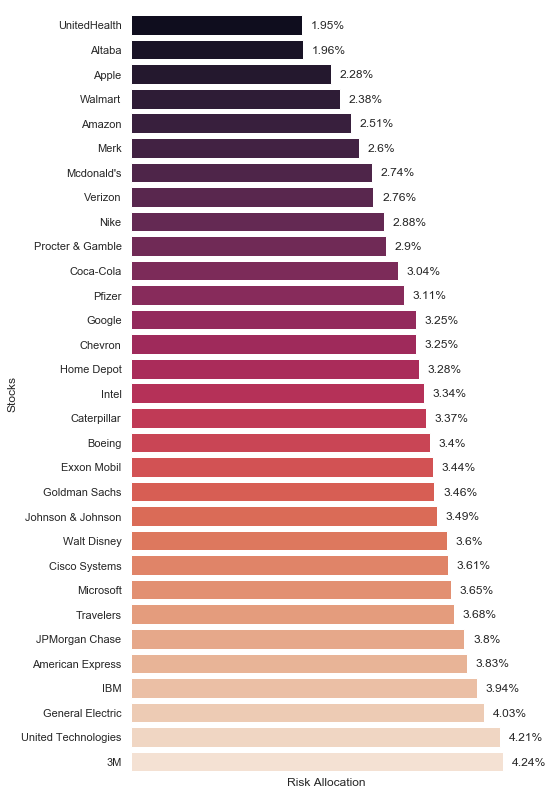

In [33]:
close_ct = nx.closeness_centrality(H_master, distance='weight')
close_ct = pd.Series(close_ct)
close_ct = close_ct / close_ct.sum()
close_ct.reset_index()
close_ct = (
        pd.DataFrame({"Stocks": close_ct.index, "Risk Allocation": close_ct.values})
        .sort_values(by="Risk Allocation", ascending=True)
        .reset_index()
        .drop("index", axis=1)
    )

plt.figure(figsize=(7,14))
sns.set_style('white')
sns.barplot(x='Risk Allocation', y='Stocks', data=close_ct, palette="rocket")
sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks([])

for i, label in enumerate(list(close_ct.index)):
    height = close_ct.loc[label, 'Risk Allocation']
    label = (close_ct.loc[label, 'Risk Allocation']*100 
                ).round(2).astype(str) + '%'
    plt.annotate(str(label), (height + 0.001, i + 0.15))

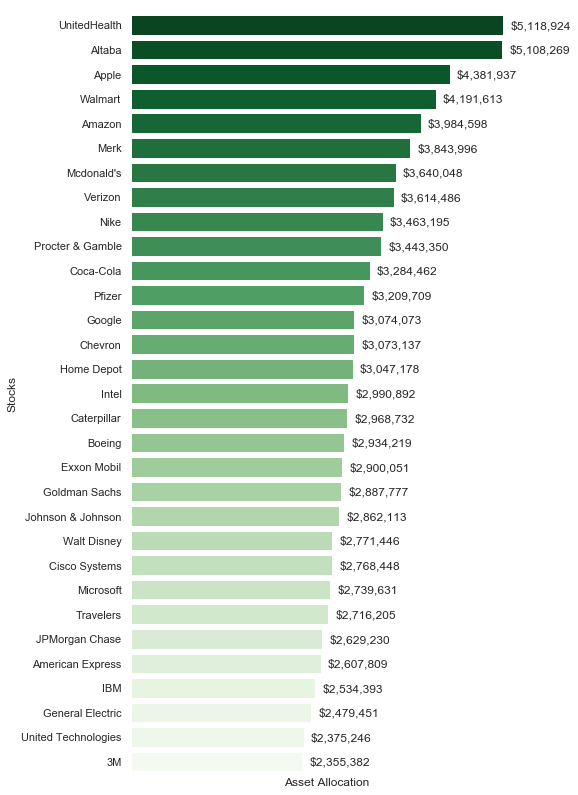

In [34]:
investments = nx.closeness_centrality(H_master, distance='weight')
investments = 1 / pd.Series(investments)
investments = investments / investments.sum()
investments.reset_index()
investments = (
        pd.DataFrame({"Stocks": investments.index, "Asset Allocation": investments.values})
        .sort_values(by="Asset Allocation", ascending=False)
        .reset_index()
        .drop("index", axis=1)
    )

plt.figure(figsize=(7,14))
sns.set_style('white')
sns.barplot(x='Asset Allocation', y='Stocks', data=investments, palette="Greens_r")
sns.despine(left=True, right=True, top=True, bottom=True)
plt.xticks([])

assets = 100000000

for i, label in enumerate(list(investments.index)):
    height = investments.loc[label, 'Asset Allocation']
    label = (investments.loc[label, 'Asset Allocation'] *  assets
                ).round(2)
    plt.annotate('${:,.0f}'.format(label), (height + 0.001, i + 0.15))